# Tutorial 7 (Model Advanced)

## Requirements
- matplotlib

This is a tutorial for E-Cell4.

In [1]:
from ecell4.core import *
from ecell4.util import *

In [2]:
@species_attributes
def attrgen(radius, D):
    K | {"radius": radius, "D": D}
    Kp | {"radius": radius, "D": D}
    Kpp | {"radius": radius, "D": D}
    KK | {"radius": radius, "D": D}
    PP | {"radius": radius, "D": D}
    K_KK | {"radius": radius, "D": D}
    Kp_KK | {"radius": radius, "D": D}
    Kpp_PP | {"radius": radius, "D": D}
    Kp_PP | {"radius": radius, "D": D}

@reaction_rules
def rulegen(kon1, koff1, kcat1, kon2, koff2, kcat2):
    (K + KK == K_KK | (kon1, koff1)
        > Kp + KK | kcat1
        == Kp_KK | (kon2, koff2)
        > Kpp + KK | kcat2)

    (Kpp + PP == Kpp_PP | (kon1, koff1)
        > Kp + PP | kcat1
        == Kp_PP | (kon2, koff2)
        > K + PP | kcat2)

In [3]:
m = NetworkModel()

In [4]:
for i, sp in enumerate(attrgen("0.0025", "1")):
    print(i, sp.serial(), sp.get_attribute("radius"), sp.get_attribute("D"))
    m.add_species_attribute(sp)

(0, u'K', u'0.0025', u'1')
(1, u'Kp', u'0.0025', u'1')
(2, u'Kpp', u'0.0025', u'1')
(3, u'KK', u'0.0025', u'1')
(4, u'PP', u'0.0025', u'1')
(5, u'K_KK', u'0.0025', u'1')
(6, u'Kp_KK', u'0.0025', u'1')
(7, u'Kpp_PP', u'0.0025', u'1')
(8, u'Kp_PP', u'0.0025', u'1')


In [5]:
ka1, kd1, kcat1 = 0.04483455086786913, 1.35, 1.5
ka2, kd2, kcat2 = 0.09299017957780264, 1.73, 15.0

for i, rr in enumerate(rulegen(ka1, kd2, kcat1, ka2, kd2, kcat2)):
    reactants, products, k = rr.reactants(), rr.products(), rr.k()
    print(i, rr.as_string())
    m.add_reaction_rule(rr)

(0, u'K+KK>K_KK|0.0448346')
(1, u'K_KK>K+KK|1.73')
(2, u'K_KK>Kp+KK|1.5')
(3, u'Kp+KK>Kp_KK|0.0929902')
(4, u'Kp_KK>Kp+KK|1.73')
(5, u'Kp_KK>Kpp+KK|15')
(6, u'Kpp+PP>Kpp_PP|0.0448346')
(7, u'Kpp_PP>Kpp+PP|1.73')
(8, u'Kpp_PP>Kp+PP|1.5')
(9, u'Kp+PP>Kp_PP|0.0929902')
(10, u'Kp_PP>Kp+PP|1.73')
(11, u'Kp_PP>K+PP|15')


In [6]:
from ecell4.gillespie import GillespieWorld as world_type, GillespieSimulator as simulator_type
# from ecell4.ode import ODEWorld as world_type, ODESimulator as simulator_type

w = world_type(Real3(1, 1, 1))
# w.bind_to(m)
w.add_molecules(Species("K"), 120)
w.add_molecules(Species("KK"), 30)
w.add_molecules(Species("PP"), 30)
sim = simulator_type(m, w)

In [7]:
obs = FixedIntervalNumberObserver(1.0, ["K", "K_KK", "Kp", "Kp_KK", "Kp_PP", "Kpp", "Kpp_PP"])
sim.run(60, [obs])

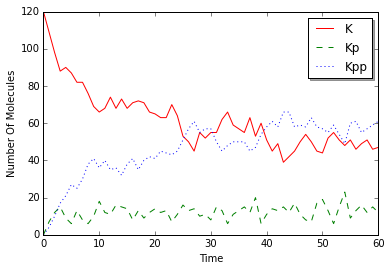

In [8]:
%matplotlib inline
import matplotlib.pylab as plt
from numpy import array

data = array(obs.data()).T
plt.plot(data[0], data[1] + data[2], "r-", label="K")
plt.plot(data[0], data[3] + data[4] + data[5], "g--", label="Kp")
plt.plot(data[0], data[6] + data[7], "b:", label="Kpp")
plt.xlabel("Time")
plt.ylabel("Number Of Molecules")
plt.xlim(data[0][0], data[0][-1])
plt.legend(loc="best", shadow=True)
plt.show()